<a href="https://colab.research.google.com/github/reinanbr/colab_notebooks/blob/main/quantum_tunelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install animateplot -U

In [2]:
from animateplot import AnimatePlot as ap
import matplotlib.pyplot as plt
import numpy as np


  if event.key is 'enter':



In [3]:
!mkdir .data

  plt.plot(x,k0_,'k--',color='green',label='energia da partícula')



Moviepy - Building video plot.mp4.
Moviepy - Writing video plot.mp4



Moviepy - Done !
Moviepy - video ready plot.mp4
playing plot.mp4


Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x10%+mdat\x00\x00\…

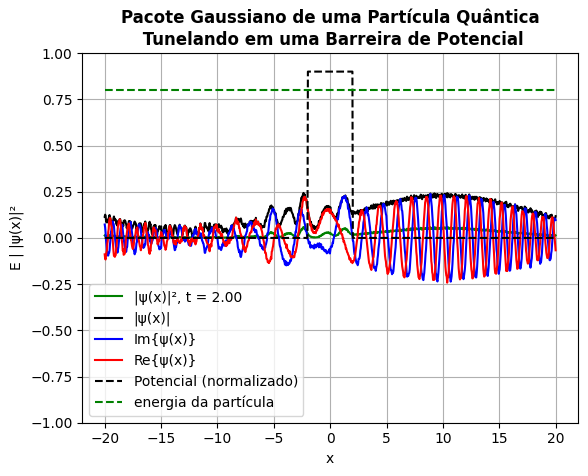

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros da simulação
L = 20.0           # Extensão do intervalo [-L, L]
N = 1024           # Número de pontos no espaço
dx = 2 * L / N     # Passo espacial
dt = 0.01         # Passo temporal
t_max = 2.5        # Tempo total de simulação
sigma = 0.5        # Largura do pacote de onda gaussiano
k0 = 5.0           # Número de onda inicial (momento central)

# Vetores de posição e número de onda
x = np.linspace(-L, L, N)
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)

# Definindo a barreira de potencial
V0 =  10.0          # Altura da barreira
width = 4.0        # Largura da barreira
V = np.zeros(N)
V[(x > -width/2) & (x < width/2) ] = V0  # Define a barreira no centro

# Pacote de onda inicial
x0 = -L / 2
psi_x = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)
psi_k = np.fft.fft(psi_x)

# Operadores de evolução temporal
U_k = np.exp(-1j * 0.5 * k**2 * dt)  # Parte cinética no espaço k
U_x = np.exp(-1j * V * dt)           # Parte potencial no espaço x

# Evolução temporal
t = 0
plt.figure()
i = 0
list_plots = []
V_ = np.copy(V)
V_[(x > -width/2) & (x < width/2)] = 1 - 1/V0
k0_ = np.full(len(x),1-1/k0)

while t < t_max:
    # Evolução em meio passo no espaço k
    psi_k = U_k * psi_k
    psi_x = np.fft.ifft(psi_k)       # Transforma para o espaço real

    # Evolução em um passo completo no espaço x
    psi_x = U_x * psi_x
    psi_k = np.fft.fft(psi_x)        # Transforma de volta para o espaço k

    # Evolução em meio passo no espaço k
    psi_k = U_k * psi_k
    psi_x = np.fft.ifft(psi_k)       # Volta ao espaço real

    t += dt

    # Visualização
    plt.clf()
    abs_psi = np.abs(psi_x)
    abs_psi2 = abs_psi**2
    plt.plot(x, abs_psi2,color='green', label=f'|ψ(x)|², t = {t:.2f}')
    plt.plot(x, abs_psi,color='black', label=f'|ψ(x)|')
    plt.plot(x, np.imag(psi_x),color='blue', label=r'Im{ψ(x)}')
    plt.plot(x, np.real(psi_x),color='red', label=r'Re{ψ(x)}')

    plt.plot(x, V_, 'k--', label='Potencial (normalizado)')
    plt.plot(x,k0_,'k--',color='green',label='energia da partícula')

    index_max = np.unravel_index(np.argmax(abs_psi2), abs_psi2.shape)[0]
    #print(x[index_max],k0_[0])
    # plt.scatter(x[index_max],k0_[0],s=40,color='green')

    plt.xlabel("x")
    plt.ylabel("E | |ψ(x)|²")
    plt.ylim(-1, 1)
    plt.legend()
    plt.grid()
    plt.title('Pacote Gaussiano de uma Partícula Quântica\n Tunelando em uma Barreira de Potencial',fontweight='bold')
    name_fig = f".data/plot_{i}.png"
    plt.savefig(name_fig)
    list_plots.append(name_fig)
    i+=1
    print(f"loading {i}...",end='\r')

anime = ap()
anime.images = list_plots
anime.render_mp4("plot.mp4")

$$ \hbar\frac{\partial}{\partial t}\psi(x,t) = (-\frac{\hbar^2}{2m} + V(x))\psi(x,t) $$

$$ V(x) = 0  $$

  plt.plot(x,k0_,'k--',color='green',label='energia da partícula')



Moviepy - Building video osci_finite.mp4.
Moviepy - Writing video osci_finite.mp4



Moviepy - Done !
Moviepy - video ready osci_finite.mp4
playing osci_finite.mp4


Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x1f3Wmdat\x00\x00\…

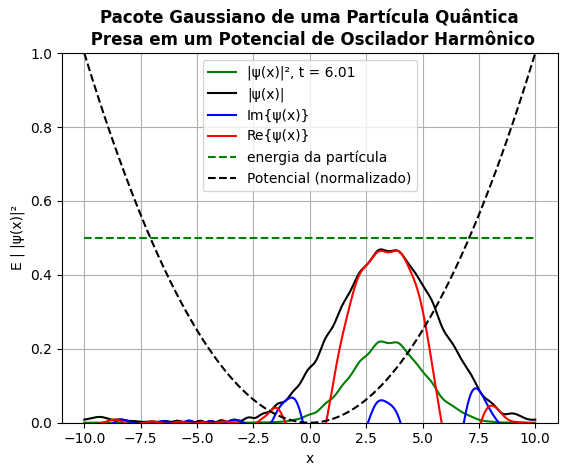

In [19]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

# Parâmetros da simulação
L = 10.0           # Extensão do intervalo [-L, L]
N = 1024           # Número de pontos no espaço
dx = 2 * L / N     # Passo espacial
dt = 0.01          # Passo temporal
t_max = 6.0        # Tempo total de simulação
sigma = 0.5        # Largura do pacote de onda gaussiano
k0 = 2.0           # Número de onda inicial (momento central)

# Parâmetros do oscilador harmônico
omega = 1.0        # Frequência do oscilador

# Vetores de posição e número de onda
x = np.linspace(-L, L, N)
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)

# Definindo o potencial do oscilador harmônico
V = 0.5 * omega**2 * x**2

# Pacote de onda inicial
x0 = -2.0          # Posição inicial do pacote de onda
psi_x = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)
psi_k = np.fft.fft(psi_x)

# Operadores de evolução temporal
U_k = np.exp(-1j * 0.5 * k**2 * dt)  # Parte cinética no espaço k
U_x = np.exp(-1j * V * dt)           # Parte potencial no espaço x

# Evolução temporal
t = 0
i=0
plot_list = []
plt.figure()
k0_ = np.full(len(x),1-1/k0)
while t < t_max:
    plt.clf()
    # Evolução em meio passo no espaço k
    psi_k = U_k * psi_k
    psi_x = np.fft.ifft(psi_k)       # Transforma para o espaço real

    # Evolução em um passo completo no espaço x
    psi_x = U_x * psi_x
    psi_k = np.fft.fft(psi_x)        # Transforma de volta para o espaço k

    # Evolução em meio passo no espaço k
    psi_k = U_k * psi_k
    psi_x = np.fft.ifft(psi_k)       # Volta ao espaço real

    t += dt

    # Visualização
    abs_psi = np.abs(psi_x)
    abs_psi2 = abs_psi**2
    plt.plot(x, abs_psi2,color='green', label=f'|ψ(x)|², t = {t:.2f}')
    plt.plot(x, abs_psi,color='black', label=f'|ψ(x)|')
    plt.plot(x, np.imag(psi_x),color='blue', label=r'Im{ψ(x)}')
    plt.plot(x, np.real(psi_x),color='red', label=r'Re{ψ(x)}')
    plt.plot(x,k0_,'k--',color='green',label='energia da partícula')

    plt.plot(x, V/V.max(), 'k--', label='Potencial (normalizado)')


    plt.title('Pacote Gaussiano de uma Partícula Quântica\n Presa em um Potencial de Oscilador Harmônico',fontweight='bold')

    # index_max = np.unravel_index(np.argmax(psi_2), psi_2.shape)[0]
    # #print(index_max[0])
    # h_k = 1/k0
    # plt.axhline(h_k,linestyle='--',color='green')
    # plt.Circle((x[index_max],h_k),10,color='green',alpha=np.abs(psi_x)[index_max])

    plt.xlabel("x")
    plt.ylabel("E | |ψ(x)|²")
    plt.ylim(0, 1)
    plt.legend(loc='upper center')
    plt.grid()
    name_fig = f".data/plot_{i}.png"
    plt.savefig(name_fig)
    plot_list.append(name_fig)


   # print(f"building plot {i}...",flush=True,end="\r")
    i+=1

anime = ap()
anime.images = plot_list
anime.render_mp4('osci_finite.mp4')

  plt.plot(x,k0_,'k--',color='green',label='energia da partícula')



Moviepy - Building video hole_finite.mp4.
Moviepy - Writing video hole_finite.mp4



Moviepy - Done !
Moviepy - video ready hole_finite.mp4
playing hole_finite.mp4


Video(value=b'\x00\x00\x00 ftypisom\x00\x00\x02\x00isomiso2avc1mp41\x00\x00\x00\x08free\x00\x19k\xe2mdat\x00\x…

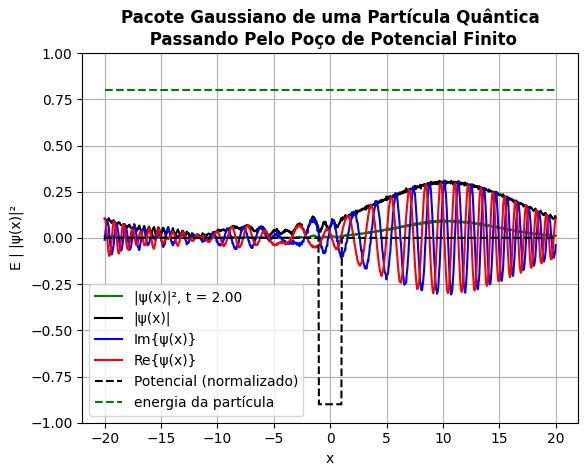

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros da simulação
L = 20.0           # Extensão do intervalo [-L, L]
N = 1024           # Número de pontos no espaço
dx = 2 * L / N     # Passo espacial
dt = 0.005         # Passo temporal
t_max = 2.0        # Tempo total de simulação
sigma = 0.6        # Largura do pacote de onda gaussiano
k0 = 5.0           # Número de onda inicial (momento central)

# Vetores de posição e número de onda
x = np.linspace(-L, L, N)
k = 2 * np.pi * np.fft.fftfreq(N, d=dx)

# Definindo o poço de potencial
V0 = -10.0         # Profundidade do poço (potencial negativo)
width = 2.0        # Largura do poço
V = np.zeros(N)
V[(x > -width/2) & (x < width/2)] = V0  # Define o poço no centro

# Pacote de onda inicial
x0 = -L / 2
psi_x = np.exp(-(x - x0)**2 / (2 * sigma**2)) * np.exp(1j * k0 * x)
psi_k = np.fft.fft(psi_x)

# Operadores de evolução temporal
U_k = np.exp(-1j * 0.5 * k**2 * dt)  # Parte cinética no espaço k
U_x = np.exp(-1j * V * dt)           # Parte potencial no espaço x

# Evolução temporal
t = 0
V_ = np.copy(V)
V_[(x > -width/2) & (x < width/2)] = -(1- abs(1/V0))
k0_ = np.full(len(x),1-1/k0)
plots_list = []
i = 0
while t < t_max:
    # Evolução em meio passo no espaço k
    psi_k = U_k * psi_k
    psi_x = np.fft.ifft(psi_k)       # Transforma para o espaço real

    # Evolução em um passo completo no espaço x
    psi_x = U_x * psi_x
    psi_k = np.fft.fft(psi_x)        # Transforma de volta para o espaço k

    # Evolução em meio passo no espaço k
    psi_k = U_k * psi_k
    psi_x = np.fft.ifft(psi_k)       # Volta ao espaço real

    t += dt

    # Visualização
    plt.clf()
    abs_psi = np.abs(psi_x)
    abs_psi2 = abs_psi**2
    plt.plot(x, abs_psi2,color='green', label=f'|ψ(x)|², t = {t:.2f}')
    plt.plot(x, abs_psi,color='black', label=f'|ψ(x)|')
    plt.plot(x, np.imag(psi_x),color='blue', label=r'Im{ψ(x)}')
    plt.plot(x, np.real(psi_x),color='red', label=r'Re{ψ(x)}')

    plt.plot(x, V_, 'k--', label='Potencial (normalizado)')
    plt.plot(x,k0_,'k--',color='green',label='energia da partícula')

    plt.xlabel("x")
    plt.ylabel("E | |ψ(x)|²")
    plt.ylim(-1, 1)
    plt.legend()
    plt.grid()
    plt.title('Pacote Gaussiano de uma Partícula Quântica\n Passando Pelo Poço de Potencial Finito',fontweight='bold')
    name_plot = f".data/plot_{V0}_{i}.png"
    plt.savefig(name_plot)
    plots_list.append(name_plot)
    print(f"loading {i}...",flush=True,end="\r")
    i+=1


anime = ap()
anime.images = plots_list
anime.render_mp4('hole_finite.mp4')


TypeError: 'Figure' object does not support item assignment

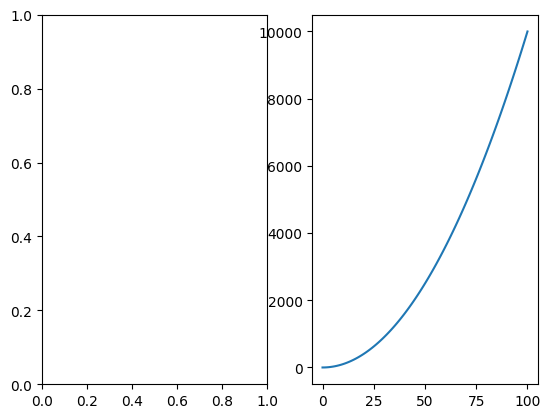

In [ ]:
axs = plt.subplots(1,2)
x = np.linspace(0,100,100)
axs[0][0] = plt.plot(x,x**2)
axs[0][1] = plt.plot(x,2*x)
axs[1,1] = plt.plot(x,1/(2+x))

plt.show()

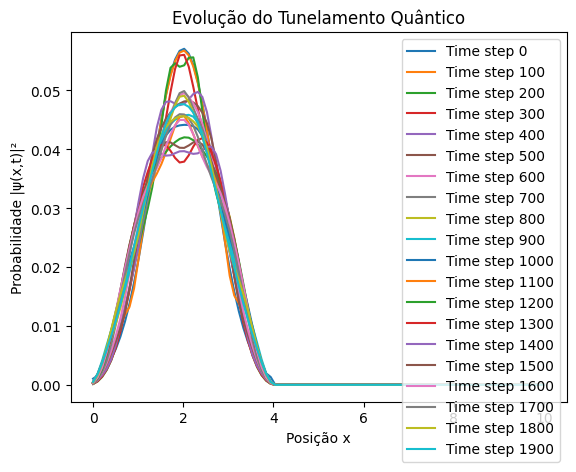

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes do sistema
hbar = 1.0  # constante de Planck reduzida
m = 1.0  # massa da partícula
L = 10.0  # comprimento da caixa (tamanho do sistema)
Nx = 100  # número de pontos na grade
dx = L / Nx  # espaçamento entre os pontos
dt = 0.001  # passo de tempo reduzido para maior estabilidade
steps = 2000  # número de passos de tempo aumentado para observar melhor o tunelamento

# Potencial (barreira de potencial)
def V(x):
    return 1e6 * np.heaviside(x - 4.0, 1)  # barreira a partir de x = 4

# Inicializando a grade espacial
x = np.linspace(0, L, Nx)

# Inicializando a função de onda (partícula começa no lado esquerdo da barreira)
psi = np.exp(-0.5 * (x - 2.0)**2)  # uma gaussiana centrada em x=2

# Normalizando a função de onda
psi /= np.linalg.norm(psi)

# Inicializando o operador cinético (discretização de segunda ordem)
T = -hbar**2 / (2 * m * dx**2) * (np.diag(-2 * np.ones(Nx)) + np.diag(np.ones(Nx - 1), 1) + np.diag(np.ones(Nx - 1), -1))

# Inicializando o operador de potencial
V_diag = np.diag(V(x))

# Hamiltoniano total
H = T + V_diag

# Lista para armazenar o módulo da função de onda em cada passo
probabilidades = []

# Evolução no tempo usando o método de diferenças finitas (método de Euler implícito)
for step in range(steps):
    # Atualizando a função de onda
    psi = np.linalg.solve(np.eye(Nx) + 1j * dt / hbar * H, psi)

    # Salvando o módulo ao quadrado da função de onda para visualização
    if step % 100 == 0:
        probabilidades.append(np.abs(psi)**2)

# Exibindo o gráfico da evolução da função de onda em diferentes tempos
for i, prob in enumerate(probabilidades):
    plt.plot(x, prob, label=f'Time step {i * 100}')
plt.xlabel('Posição x')
plt.ylabel('Probabilidade |ψ(x,t)|²')
plt.title('Evolução do Tunelamento Quântico')
plt.legend()
plt.show()


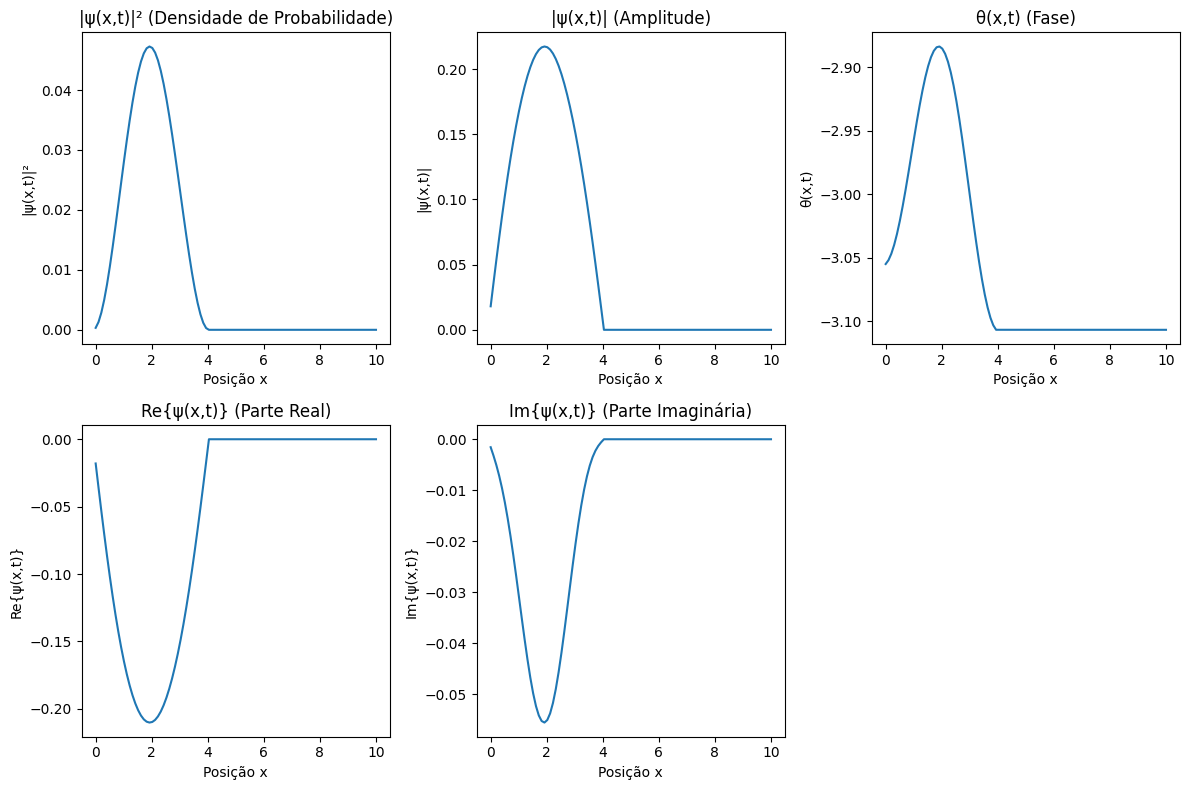

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes do sistema
hbar = 1.0  # constante de Planck reduzida
m = 1.0  # massa da partícula
L = 10.0  # comprimento da caixa (tamanho do sistema)
Nx = 100  # número de pontos na grade
dx = L / Nx  # espaçamento entre os pontos
dt = 0.01  # passo de tempo
steps = 1000  # número de passos de tempo

# Potencial (barreira de potencial)
def V(x):
    return 1e6 * np.heaviside(x - 4.0, 1)  # barreira a partir de x = 4

# Inicializando a grade espacial
x = np.linspace(0, L, Nx)

# Inicializando a função de onda (partícula começa no lado esquerdo da barreira)
psi = np.exp(-0.5 * (x - 2.0)**2)  # uma gaussiana centrada em x=2

# Normalizando a função de onda
psi /= np.linalg.norm(psi)

# Inicializando o operador cinético (discretização de segunda ordem)
T = -hbar**2 / (2 * m * dx**2) * (np.diag(-2 * np.ones(Nx)) + np.diag(np.ones(Nx - 1), 1) + np.diag(np.ones(Nx - 1), -1))

# Inicializando o operador de potencial
V_diag = np.diag(V(x))

# Hamiltoniano total
H = T + V_diag

# Evolução no tempo usando o método de diferenças finitas (método de Euler implícito)
for step in range(steps):
    # Atualizando a função de onda
    psi = np.linalg.solve(np.eye(Nx) + 1j * dt / hbar * H, psi)

# Cálculo das quantidades
probabilidade = np.abs(psi)**2           # Densidade de probabilidade |ψ(x,t)|²
amplitude = np.abs(psi)                  # Amplitude |ψ(x,t)|
fase = np.angle(psi)                     # Fase θ(x,t)
parte_real = np.real(psi)                # Parte real Re{ψ(x,t)}
parte_imaginaria = np.imag(psi)          # Parte imaginária Im{ψ(x,t)}

# Plotando os resultados
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.plot(x, probabilidade)
plt.title('|ψ(x,t)|² (Densidade de Probabilidade)')
plt.xlabel('Posição x')
plt.ylabel('|ψ(x,t)|²')

plt.subplot(2, 3, 2)
plt.plot(x, amplitude)
plt.title('|ψ(x,t)| (Amplitude)')
plt.xlabel('Posição x')
plt.ylabel('|ψ(x,t)|')

plt.subplot(2, 3, 3)
plt.plot(x, fase)
plt.title('θ(x,t) (Fase)')
plt.xlabel('Posição x')
plt.ylabel('θ(x,t)')

plt.subplot(2, 3, 4)
plt.plot(x, parte_real)
plt.title('Re{ψ(x,t)} (Parte Real)')
plt.xlabel('Posição x')
plt.ylabel('Re{ψ(x,t)}')

plt.subplot(2, 3, 5)
plt.plot(x, parte_imaginaria)
plt.title('Im{ψ(x,t)} (Parte Imaginária)')
plt.xlabel('Posição x')
plt.ylabel('Im{ψ(x,t)}')

plt.tight_layout()
plt.show()
